## Q5: Differentiate a function
---

We compute the derivative of the function $ f(x) = log(sin(x)) + x^2 cos(x) $ using 
 - dual numbers
 - the analytical derivative
 - numerically, with decreasing step size

and compare the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dual_autodiff as df

Company package version: 0.0.0b1.dev8+g1a7def8.d20241208


Firstly, I compute the derivative of the function using dual numbers.

In [ ]:
# Define a function that we would like to differentiate. 
output = (x.sin()).log() + (x**2) * x.cos()

# Compute the gradient at x==1.5 using Taylors' Theorem
x=df.Dual(1.5,1)
grad_dual=output.dual
print(grad_dual)

-1.9612372705533612


Secondly, I compute the analytical derivative of the function.

In [6]:
# Compare to the analytical result
def f_prime(x):
    return 1/np.tan(x) + 2*x*np.cos(x) - x**2 * np.sin(x)

grad_anal=f_prime(1.5)
print(grad_anal)

-1.9612372705533612


 This result agrees with the gradient obtained using dual numbers at the machine precision level (up to 1e-16)! This shows that the dual number method is very accurate, which is highly useful for performing automatic differentiation.

Thirdly, for comparison, I compute the numerical derivative of the function using a decreasing step size. I have also plotted the results and included the dual/analytical derivative for comparison.

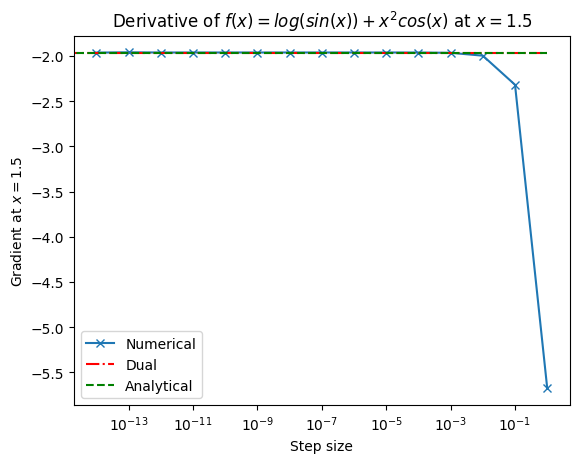

In [54]:
# Define the function f to compute the numerical gradient
def f(x):
    y = np.log(np.sin(x)) + x**2 *np.cos(x)
    return y

# Compute the numerical gradient at x==1.5    
x=1.5  

grad_num=[]
for i in range(15):
    eps=10**(-i)
    y = (f(x+eps) - f(x))/eps
    grad_num.append(y)

# Plot the gradient at each step size
step_size=[10**(-i) for i in range(15)]
plt.plot(step_size, grad_num, marker='x', label="Numerical")
plt.xlabel("Step size")
plt.xscale('log')
plt.ylabel("Gradient at $x=1.5$")
plt.title("Derivative of $ f(x) = log(sin(x)) + x^2 cos(x) $ at $x=1.5$")
plt.hlines(grad_dual, xmin=0, xmax=1, color='r', ls="-.", label= "Dual")
plt.hlines(grad_anal, xmin=0, xmax=1, color='g', ls="--", label= "Analytical")
plt.legend()
plt.show()


This looks like a good approximation to the derivative, but if we examine the errors, we find that it is not as accurate as the dual number method. I have plotted the error below.

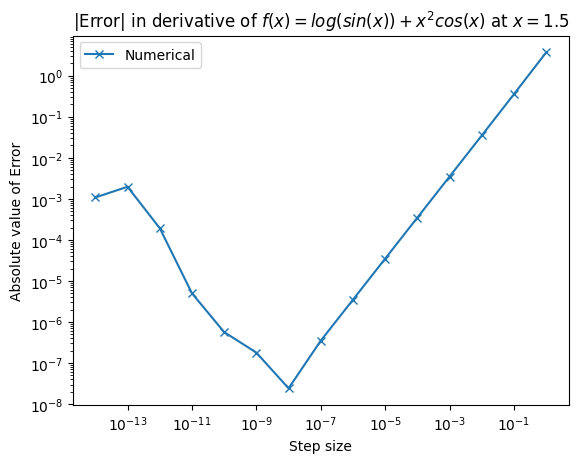

In [ ]:
# Plot the error at each step size
step_size=[10**(-i) for i in range(15)]
plt.plot(step_size, np.abs(grad_num-grad_anal), marker='x', label="Numerical")
plt.xlabel("Step size")
plt.ylabel("Absolute value of Error")
plt.xscale('log')
plt.yscale('log')
#plt.ylim(10**(-9), 10**(0))
plt.title("|Error| in derivative of $ f(x) = log(sin(x)) + x^2 cos(x) $ at $x=1.5$")
plt.legend()
plt.show()

In summary, the numerical method is limited by the step size, which can introduce errors if it becomes too large (because the higher order terms in the Taylor expansion are not yet small enough) or too small (due to rounding error). 